In [68]:
import pandas as pd

# === Load Dataset ===
df = pd.read_csv("heart.csv")

In [69]:
print("Jumlah data:", df.shape)
print("\n5 data teratas:")
print(df.head())

Jumlah data: (920, 16)

5 data teratas:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    

In [70]:
# List Kolom pada Data
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [71]:
# === Cek Missing Value ===
print("\nMissing values tiap kolom:")
print(df.isnull().sum())


Missing values tiap kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [72]:
df_clean = df.dropna()

In [73]:
# Penyederhanaan data Penyakit
df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\annas\AppData\Local\Temp\ipykernel_21564\2635400629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)


C:\Users\annas\AppData\Local\Temp\ipykernel_21564\2450923549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_clean, palette='coolwarm')


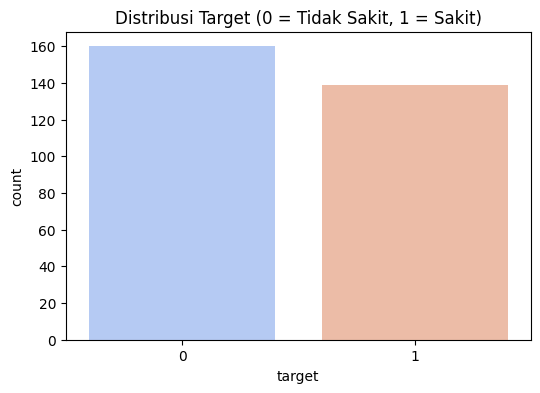

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Exploratory Data Analysis (EDA) singkat ===
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df_clean, palette='coolwarm')
plt.title("Distribusi Target (0 = Tidak Sakit, 1 = Sakit)")
plt.show()

In [75]:
# === Preprocessing ===
X = df_clean.drop("target", axis=1)
y = df_clean["target"]

In [76]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
label_encoders = {}

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':  # kalau tipenya string
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])
        label_encoders[col] = le

# Baru scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [77]:
from sklearn.model_selection import train_test_split

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# === Definisi Model ===
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [79]:
results = []


=== KNN ===
              precision    recall  f1-score   support

           0      0.811     0.938     0.870        32
           1      0.913     0.750     0.824        28

    accuracy                          0.850        60
   macro avg      0.862     0.844     0.847        60
weighted avg      0.859     0.850     0.848        60



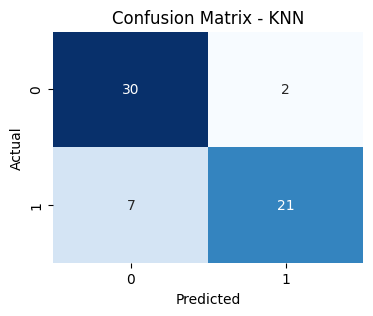


=== SVM ===
              precision    recall  f1-score   support

           0      0.939     0.969     0.954        32
           1      0.963     0.929     0.945        28

    accuracy                          0.950        60
   macro avg      0.951     0.949     0.950        60
weighted avg      0.950     0.950     0.950        60



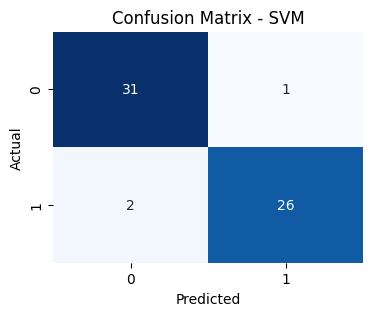


=== Naive Bayes ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        32
           1      1.000     1.000     1.000        28

    accuracy                          1.000        60
   macro avg      1.000     1.000     1.000        60
weighted avg      1.000     1.000     1.000        60



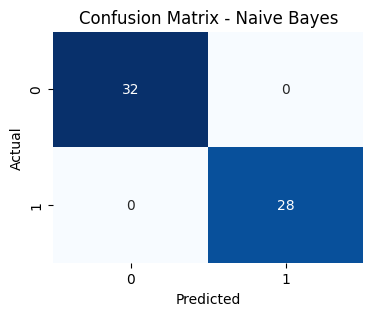


=== Decision Tree ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        32
           1      1.000     1.000     1.000        28

    accuracy                          1.000        60
   macro avg      1.000     1.000     1.000        60
weighted avg      1.000     1.000     1.000        60



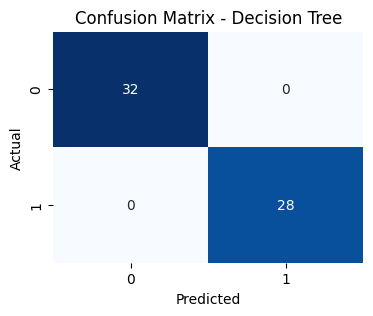

In [80]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# === Training & Evaluasi ===
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    start = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1, train_time, pred_time])

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [81]:
# === Hasil Perbandingan ===
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "Train Time (s)", "Pred Time (s)"])
print("\nHasil Perbandingan:")
print(results_df)


Hasil Perbandingan:
           Model  Accuracy  Precision    Recall        F1  Train Time (s)  \
0            KNN      0.85   0.913043  0.750000  0.823529        0.002074   
1            SVM      0.95   0.962963  0.928571  0.945455        0.009716   
2    Naive Bayes      1.00   1.000000  1.000000  1.000000        0.001031   
3  Decision Tree      1.00   1.000000  1.000000  1.000000        0.002011   

   Pred Time (s)  
0       0.008851  
1       0.001020  
2       0.001505  
3       0.000000  


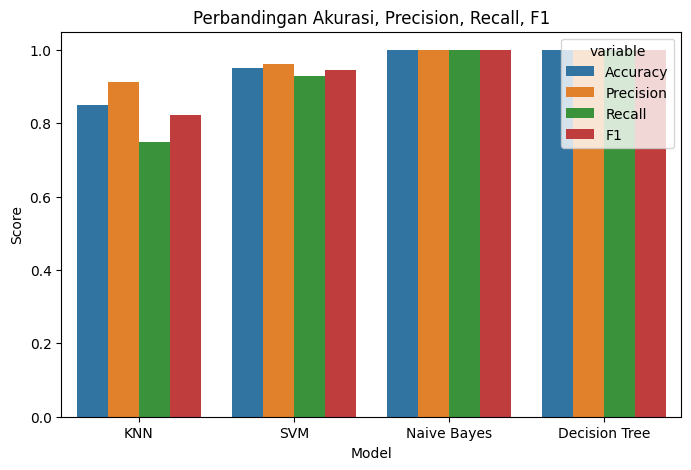

In [82]:
# Plot hasil perbandingan
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["Accuracy", "Precision", "Recall", "F1"]),
            x="Model", y="value", hue="variable")
plt.title("Perbandingan Akurasi, Precision, Recall, F1")
plt.ylabel("Score")
plt.show()

# Normalisasi
# Ambil fitur yang dibutuhkan
# Ambil rentan nilai yang paling sederhana
# Cegah overfitting